In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os as os
import datetime
import seaborn as sns

sns.set_style('darkgrid')
sensor_labels = ['3.3V 10A', '12V 10A', 'Ext 12V 20A', 'USB-C 20V 5A']
line_color = ['b', 'r', 'k', 'k']

## read data

In [2]:
def read_datafile(file_name, sensor):
    with open(file_name, newline='') as csvfile:
        data = []
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            data.append(row)
    data = np.array(data[1:])
    volt = [float(dat) for dat in data.transpose()[4+1+sensor*3].flatten()]
    current = [float(dat) for dat in data.transpose()[4+sensor*3].flatten()]
    power = [volt[cnt]*current[cnt] for cnt in range(len(volt))]
    time = [float(dat) for dat in data.transpose()[1].flatten()]
    dtime = [float(dat) for dat in data.transpose()[2].flatten()]
    return volt, current, power, time, dtime

In [118]:
#file_location = 'D:/Users/Schoonderbeek/Downloads/PowerSensor3_sweeps/5A_24hours/'
#file_location = 'D:/GIT/powersensor3/Measurements/Sweeps/long_term/'
file_location = 'M:/VIEWlogic/Projects/PowerSensor/Measurements/Sweep_Set3/'
sensor = 2 # 12V 7.5 A
process_files = ['step_100Hz_80pr_8A.csv']
#process_files = ['step_100Hz_90pr_1A.csv']
voltages=[]
currents=[]
cur_max=[]
cur_min=[]
volt_max=[]
volt_min=[]
time_scale=[]
powers=[]
pwr_max=[]
pwr_min=[]
for file_name in process_files:
    current=[]
    file_name = file_location + file_name
    file_time = os.path.getmtime(file_name)
    time_scale.append(os.path.getmtime(file_name))
    volt, current, power, time, dtime = read_datafile(file_name, sensor)
    voltages.append(np.mean(volt))
    volt_max.append(np.max(volt))
    volt_min.append(np.min(volt))
    currents.append(np.mean(current))
    cur_max.append(np.max(current))
    cur_min.append(np.min(current))
    powers.append(np.mean(power))
    pwr_max.append(np.max(power))
    pwr_min.append(np.min(power))


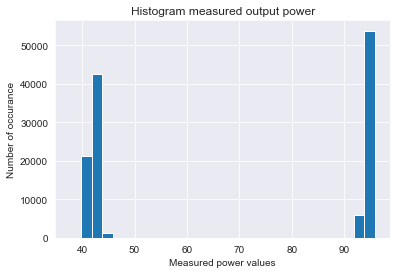

In [119]:
steps = 30
bins = [np.min(power) + cnt*(np.max(power) - np.min(power))/steps for cnt in range(steps) ]
plt.figure(6)
plt.hist(power, bins)
plt.xlabel("Measured power values")
plt.ylabel("Number of occurance")
plt.grid(True)
plt.title(f"Histogram measured output power")
plt.show()

In [120]:
def avg_data_calc(avg_samples = 32, power=power):
    tot_samples = int(len(power)/avg_samples)*avg_samples
    avg_data = np.mean(np.array(power[:tot_samples]).reshape(-1,avg_samples),axis=1)
    return avg_data, tot_samples

Avg Samples:   1, tot samples: 131135, min: 37.764, max: 97.867, peak-peak: 60.103, std: 26.196
Avg Samples:   2, tot samples: 131134, min: 38.504, max: 96.811, peak-peak: 58.307, std: 26.102
Avg Samples:   4, tot samples: 131132, min: 39.728, max: 96.258, peak-peak: 56.530, std: 25.930
Avg Samples:   8, tot samples: 131128, min: 40.102, max: 95.724, peak-peak: 55.622, std: 25.580
Avg Samples:  16, tot samples: 131120, min: 41.067, max: 95.429, peak-peak: 54.362, std: 24.864
Avg Samples:  32, tot samples: 131104, min: 41.393, max: 95.253, peak-peak: 53.860, std: 23.368
Avg Samples:  64, tot samples: 131072, min: 41.879, max: 95.096, peak-peak: 53.217, std: 20.042
Avg Samples: 128, tot samples: 131072, min: 52.712, max: 84.348, peak-peak: 31.636, std: 11.057


C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_76568\4086896327.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


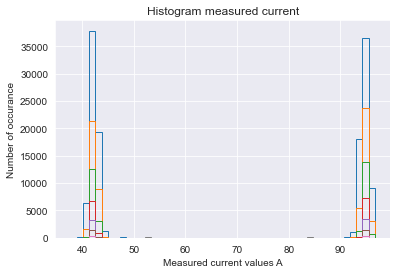

In [121]:
fig, ax = plt.subplots()
def plot_histogram(data, type_data, steps):
    if type_data == "power":
        unit = 'W'
    elif type_data == "current":
        unit = 'A'
    elif type_data == "voltage":
        unit = 'V'
    else:
        unit = ' '
    steps_histogram = 50
    bins = [np.min(data) + cnt*(np.max(data) - np.min(data))/steps_histogram for cnt in range(steps_histogram) ]
    for cnt in range(steps):
        avg_samples = 2**cnt
        avg_data, tot_samples = avg_data_calc(avg_samples, data)
        stri = f"Avg Samples: {avg_samples:3}, tot samples: {tot_samples}, min: {np.min(avg_data):5.3f}, max: {np.max(avg_data):5.3f}, " 
        stri += f"peak-peak: {np.max(avg_data)-np.min(avg_data):5.3f}, std: {np.std(avg_data):5.3f}"
        print(stri)
        ax.hist(avg_data, bins, histtype='step')

    ax.set(xlabel=f"Measured {type_data} values {unit}" , ylabel="Number of occurance",
           title=f"Histogram measured {type_data}")

plot_histogram(power, "current", 8)
ax.grid(True)
fig.show()

C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_76568\3830881151.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


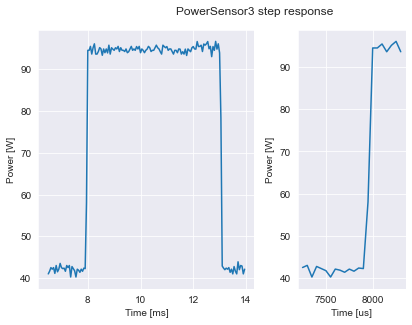

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2)
start_point_1 = 130 #35
points = 150
time_ms = [start_point_1*50e-3 + cnt * 50e-3 for cnt in range(points)]
ax1.plot(time_ms, power[start_point_1:start_point_1+points], label="Max.")
ax1.set(xlabel=f"Time [ms]" , ylabel="Power [W]")
ax1.set_position([0, 0, 0.50, 0.9])
#ax1.set_ylim(ymin=0, ymax=15)
#ax1.set_xlim(2, 9)

start_point_2 = start_point_1+15
points = 22
time_ms = [start_point_2*50 + cnt * 50 for cnt in range(points)]
ax2.plot(time_ms, power[start_point_2:start_point_2+points], label="Max.")
ax2.set(xlabel=f"Time [us]" , ylabel="Power [W]")
ax2.grid(True)
ax2.set_position([0.6, 0, 0.25, 0.9])
#ax2.set_ylim(ymin=0, ymax=15)
#ax2.set_xlim(2500, 3500)
fig.suptitle("PowerSensor3 step response")
fig.savefig("step.pdf", bbox_inches = 'tight')
fig.show()

C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_76568\1208124539.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Median sample frequency: 20.00 kHz, Max 100.00 kHz, Min   0.16 kHz, STD 14131.46 Hz
(4096, 32)


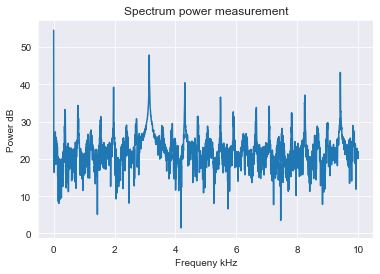

In [123]:
fig, ax = plt.subplots()
points=4096
sample_frequency = [1/(time[n+1] - time[n]) for n in range(len(time)-1)]
fs = np.median(sample_frequency)/1000
print(f"Median sample frequency: {fs:4.2f} kHz, Max {np.max(sample_frequency)/1000:6.2f} kHz, Min {np.min(sample_frequency)/1000:6.2f} kHz, STD {np.std(sample_frequency):6.2f} Hz")

block = int(len(power)/points)
rshape_power = np.resize(power[:block*points],(points,block))
print(np.shape(rshape_power))
f_power = np.mean(np.fft.fft2((rshape_power)),1)
fas = [n*fs/points for n in range(points)]

ax.plot(fas[:int(points/2)], 10*np.log10(abs(f_power[:int(points/2)])), label="Max.")
ax.set(xlabel=f"Frequeny kHz" , ylabel="Power dB", title=f"Spectrum power measurement")


ax.grid(True)
fig.show()